<a href="https://colab.research.google.com/github/HSSunag/Final-Project/blob/master/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy
import keras
import os
import tensorflow as tf

dataset_dir="drive/My Drive/DataSet/Training/cat"
def images_to_array(dataset_dir, image_size):
    dataset_array = []
    dataset_labels = []

    class_counter = 0

    classes_names = os.listdir(dataset_dir)
    for current_class_name in classes_names:
        class_dir = os.path.join(dataset_dir, current_class_name)
        images_in_class = os.listdir(class_dir)

        print("Class index", class_counter, ", ", current_class_name, ":" , len(images_in_class))

        for image_file in images_in_class:
            if image_file.endswith(".jpg"):
              image_file_dir = os.path.join(class_dir, image_file)

              img = keras.preprocessing.image.load_img(image_file_dir, target_size=(image_size, image_size))
              img_array = keras.preprocessing.image.img_to_array(img)

              img_array = img_array/255.0

              dataset_array.append(img_array)
              dataset_labels.append(class_counter)
        class_counter = class_counter + 1
    dataset_array = numpy.array(dataset_array)
    dataset_labels = numpy.array(dataset_labels)
    return dataset_array, dataset_labels



train_dir = "drive/My Drive/Datasets"
image_size = 128
train_dataset_array, train_dataset_array_labels = images_to_array(dataset_dir=train_dir, image_size=image_size)
print("Training Data Array Shape :", train_dataset_array.shape)
numpy.save("train_dataset_array.npy", train_dataset_array)
numpy.save("train_dataset_array_labels.npy", train_dataset_array_labels)

'''test_dir = "drive/My Drive/DataSet/Testing/test"
test_dataset_array, test_dataset_array_labels = images_to_array(dataset_dir=test_dir, image_size=image_size)
print("Test Data Array Shape :", test_dataset_array.shape)
numpy.save("test_dataset_array.npy", test_dataset_array)
numpy.save("test_dataset_array_labels.npy", test_dataset_array_labels)'''

Using TensorFlow backend.


Class index 0 ,  Category 1 : 195
Class index 1 ,  Category 2 : 150
Class index 2 ,  Category 3 : 161
Training Data Array Shape : (506, 128, 128, 3)


'test_dir = "drive/My Drive/DataSet/Testing/test"\ntest_dataset_array, test_dataset_array_labels = images_to_array(dataset_dir=test_dir, image_size=image_size)\nprint("Test Data Array Shape :", test_dataset_array.shape)\nnumpy.save("test_dataset_array.npy", test_dataset_array)\nnumpy.save("test_dataset_array_labels.npy", test_dataset_array_labels)'

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [4]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(3, activation='softmax')) 

In [5]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:

from sklearn.model_selection import train_test_split

train_dataset_array,  test_dataset_array, train_dataset_array_labels,test_dataset_array_labels=train_test_split(train_dataset_array,train_dataset_array_labels,test_size=0.33,shuffle=True)

from keras.utils import to_categorical
y_train_one_hot = to_categorical(train_dataset_array_labels)
y_test_one_hot = to_categorical(test_dataset_array_labels)

In [7]:
print(len(test_dataset_array))
print(len(test_dataset_array_labels))
print(len(train_dataset_array))
print(len(train_dataset_array_labels))

167
167
339
339


In [8]:
hist = model.fit(train_dataset_array, y_train_one_hot,
           batch_size=10, epochs=8, validation_split=0.25)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 254 samples, validate on 85 samples
Epoch 1/8





254/254 [==============================] - 20s 78ms/step - loss: 1.5339 - acc: 0.4252 - val_loss: 1.0344 - val_acc: 0.6471
Epoch 2/8
254/254 [==============================] - 18s 69ms/step - loss: 0.9401 - acc: 0.6339 - val_loss: 0.8422 - val_acc: 0.5765
Epoch 3/8
254/254 [==============================] - 18s 69ms/step - loss: 0.7235 - acc: 0.7087 - val_loss: 0.7006 - val_acc: 0.6941
Epoch 4/8
254/254 [==============================] - 17s 69ms/step - loss: 0.5630 - acc: 0.7598 - val_loss: 0.6821 - val_acc: 0.7765
Epoch 5/8
254/254 [==============================] - 17s 69ms/step - loss: 0.4521 - acc: 0.8268 - val_loss: 0.6407 - val_acc: 0.7294
Epoch 6/8
254/254 [==============================] - 17s 68ms/step - loss: 0.4339 - acc: 0.8268 - val_loss: 0.4645 - val_acc: 0.8118
Epoch 7/8
254/254 [==============================] - 17

In [9]:
model.evaluate(test_dataset_array, y_test_one_hot)

167/167 [==============================] - 1s 8ms/step


[0.5355554428286181, 0.7604790426299958]

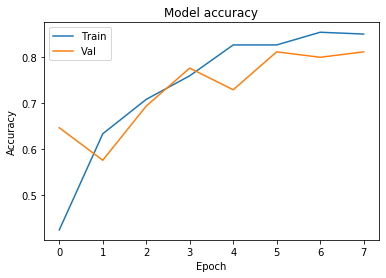

In [10]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [11]:
print(hist.history['acc'])

[0.4251968555563078, 0.6338582707671668, 0.7086614192001462, 0.7598425182770556, 0.8267716460340605, 0.8267716507273396, 0.8543307006828428, 0.8503936909315154]


In [12]:
print(y_train_one_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [13]:
hist.history.get('acc')[-1]

0.8503936909315154